In [ ]:
#Ques - 1
##Tossing a coin 10,000 times and calculating the experimental probability of heads and tails
import random

heads = 0
tails = 0
trials = 10000

for _ in range(trials):
    if random.random() < 0.5:
        heads += 1
    else:
        tails += 1

prob_heads = heads / trials
prob_tails = tails / trials

print(f"Heads: {heads}, Probability: {prob_heads}")
print(f"Tails: {tails}, Probability: {prob_tails}")

Heads: 4989, Probability: 0.4989
Tails: 5011, Probability: 0.5011


In [ ]:
#Ques - 2
##Rolling two dice and computing the probability of getting a sum of 7
import random

trials = 10000
sum_seven = 0

for _ in range(trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        sum_seven += 1

prob_sum_seven = sum_seven / trials

print(f"Number of times sum is 7: {sum_seven}")
print(f"Experimental probability of sum 7: {prob_sum_seven}")

Number of times sum is 7: 1648
Experimental probability of sum 7: 0.1648


In [ ]:
#Ques - 3
##Conditional Probability and Baye's Theorem

# Simulating drawing balls from a bag and estimating conditional probability
import random

# Ball colors and their counts
balls = ['red'] * 5 + ['green'] * 7 + ['blue'] * 8
trials = 1000

# Track draws
draws = []

# Simulate 1000 draws with replacement
for _ in range(trials):
    draws.append(random.choice(balls))

# a. Probability of drawing a red ball given previous ball was blue
count_blue = 0
count_red_after_blue = 0

for i in range(1, trials):
    if draws[i-1] == 'blue':
        count_blue += 1
        if draws[i] == 'red':
            count_red_after_blue += 1

if count_blue > 0:
    prob_red_given_blue = count_red_after_blue / count_blue
else:
    prob_red_given_blue = 0

print(f"Probability of drawing red given previous was blue: {prob_red_given_blue}")

# b. Verify Bayes' theorem
# P(Red|Blue_prev) ≈ P(Blue_prev|Red) * P(Red) / P(Blue)

# P(Red)
prob_red = draws.count('red') / trials
# P(Blue)
prob_blue = draws.count('blue') / trials

# P(Blue_prev|Red): probability previous was blue given current is red
count_red = 0
count_blue_prev_given_red = 0
for i in range(1, trials):
    if draws[i] == 'red':
        count_red += 1
        if draws[i-1] == 'blue':
            count_blue_prev_given_red += 1

if count_red > 0:
    prob_blue_prev_given_red = count_blue_prev_given_red / count_red
else:
    prob_blue_prev_given_red = 0

# Bayes' theorem estimate
if prob_blue > 0:
    bayes_estimate = prob_blue_prev_given_red * prob_red / prob_blue
else:
    bayes_estimate = 0

print(f"Bayes' theorem estimate: {bayes_estimate}")
print(f"Direct simulation: {prob_red_given_blue}")

Probability of drawing red given previous was blue: 0.2366412213740458
Bayes' theorem estimate: 0.23664122137404578
Direct simulation: 0.2366412213740458


In [ ]:
#Ques - 4
##Random variables and discrete Probability
import numpy as np

# Define possible values and their probabilities
values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.4]

# Generate a sample of size 1000
sample = np.random.choice(values, size=1000, p=probabilities)

# Compute empirical mean, variance, and standard deviation
mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

print(f"Empirical Mean: {mean}")
print(f"Empirical Variance: {variance}")
print(f"Empirical Standard Deviation: {std_dev}")

Empirical Mean: 2.19
Empirical Variance: 0.6199000000000001
Empirical Standard Deviation: 0.7873372847769882


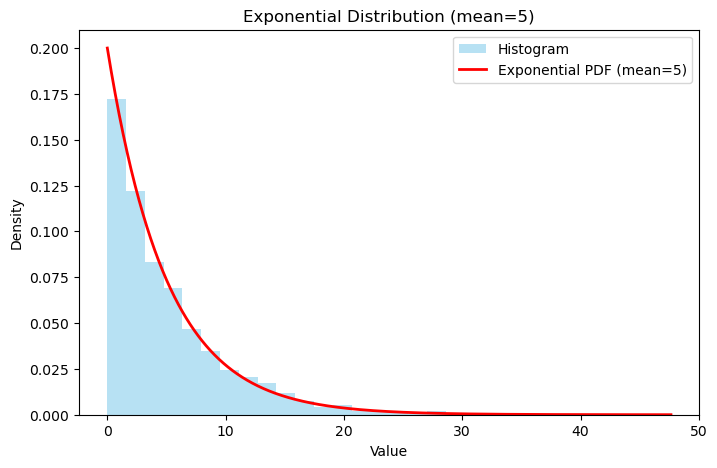

In [ ]:
#Ques - 5
##Continuous Random Variables
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = 5
size = 2000

# Simulate 2000 samples from exponential distribution with mean=5
samples = np.random.exponential(scale=mean, size=size)

# Plot histogram
plt.figure(figsize=(8, 5))
count, bins, ignored = plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')

# Overlay PDF
x = np.linspace(0, np.max(samples), 1000)
pdf = (1/mean) * np.exp(-x/mean)
plt.plot(x, pdf, 'r-', lw=2, label='Exponential PDF (mean=5)')

plt.title('Exponential Distribution (mean=5)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

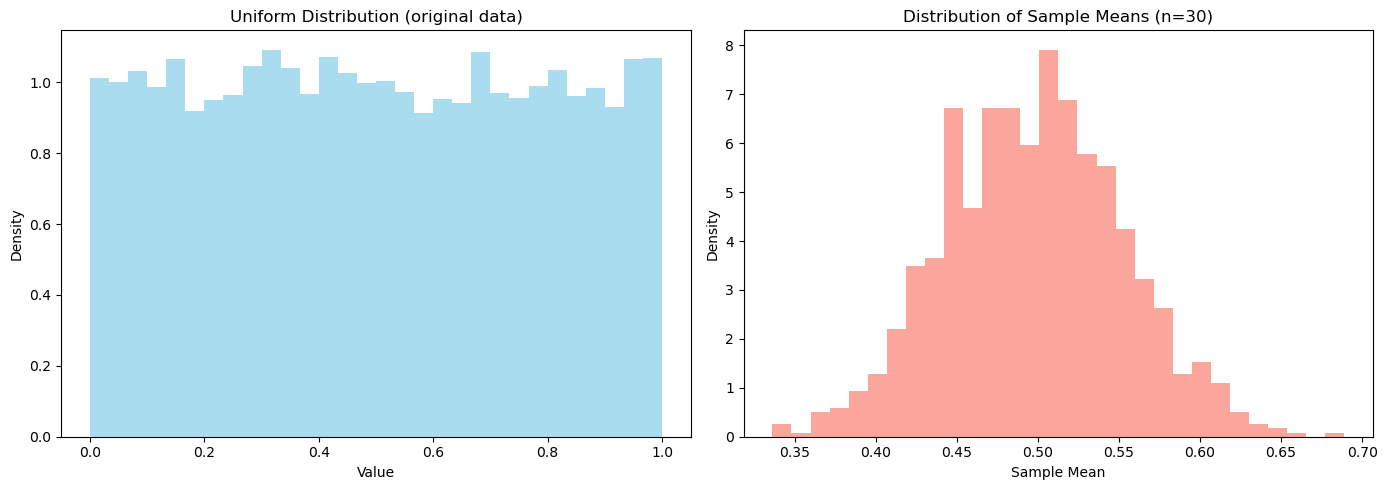

In [ ]:
#Ques - 6
##Central Limit Theorem

import numpy as np
import matplotlib.pyplot as plt

# a. Generate 10,000 random numbers from a uniform distribution
uniform_data = np.random.uniform(low=0, high=1, size=10000)

# b. Draw 1000 samples of size n = 30 and calculate their means
sample_size = 30
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(uniform_data, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# c. Plot both the uniform distribution and the sample mean distribution
plt.figure(figsize=(14, 5))

# Plot uniform distribution
plt.subplot(1, 2, 1)
plt.hist(uniform_data, bins=30, density=True, color='skyblue', alpha=0.7)
plt.title('Uniform Distribution (original data)')
plt.xlabel('Value')
plt.ylabel('Density')

# Plot sample mean distribution
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, density=True, color='salmon', alpha=0.7)
plt.title('Distribution of Sample Means (n=30)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

plt.tight_layout()
plt.show()